In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
L = 100/0.0529177      #lenght of the box [a.u]
N = 201         #number of points
m = 0.067 * 1   #electron mass [a.u.]
hw = 5/27211.6        #oscilator energy [a.u]
h = 1           #dirac constant [a.u]
w = hw / h
T = 2* np.pi/w
dt = 1          #time step [a.u.]
x0 = 30/0.0529177       #[a.u.]
dx = 2*L/(N-1)

In [3]:
def hamiltonian(x: int, t: int, psi: list, xs: list):
    return -h**2/(m*2) * (psi[t-1,x+1] + psi[t-1,x-1] - 2*psi[t-1,x])/dx**2   + 1/2 * m*w**2 * xs[x]**2 * psi[t-1,x]

def ham(x: int, t: int, psi: list, xs: list):
    return -1/(2*m) * 1  * (psi[t-1,x+1] + psi[t-1,x-1] - 2*psi[t-1,x])/dx**2  + 1/2 * m*w**2 * xs[x]**2 * psi[t-1,x]


def normalisation(t: int, psi: list):
    I = 0
    for i in range(1, N-1): 
        I = I + np.abs(psi[t, i])**2 * dt 
    
    for i in range(1, N-1):
        psi[t, i] = psi[t, i]/np.sqrt(I)

    return psi[t,:]

In [4]:
t = np.linspace(0, 10*T, 10*int((T/dt)))
x_list = np.linspace(-100, 100, N)/0.0529177  


In [5]:
psi = np.zeros([len(t), len(x_list)], dtype="complex_")

In [6]:
len(x_list)

201

zad 1

In [7]:
#firts time bound condition
for i in range(1, N-1):
    psi[0,i] = np.exp(-m*w*((x_list[i]-x0)**2)/2)

#normalisation
C = dx*sum(psi[0]**2)
psi[0] = psi[0]/np.sqrt(C)

#second time bound condition
for i in range(1, N-1):
    psi[1, i] = psi[0, i] * np.exp(-1j*(w*dt/2))

#main part
for j in range(2, len(t)): 
    for i in range(1, N-1):
        psi[j, i] = psi[j-2, i] + (2*dt)/(1j*h) * ham(i, j, psi, x_list)



KeyboardInterrupt: 

In [ ]:
psi_sq = np.abs(psi)**2

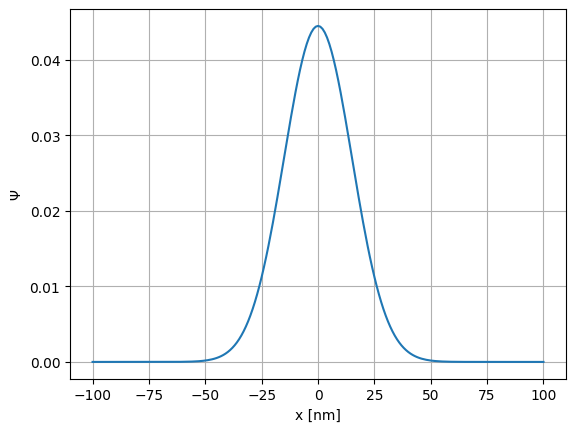

In [ ]:
plt.plot(x_list*0.05292, psi[0].real)
plt.xlabel('x [nm]')
plt.ylabel(r'$\Psi$')
plt.grid()
plt.show()

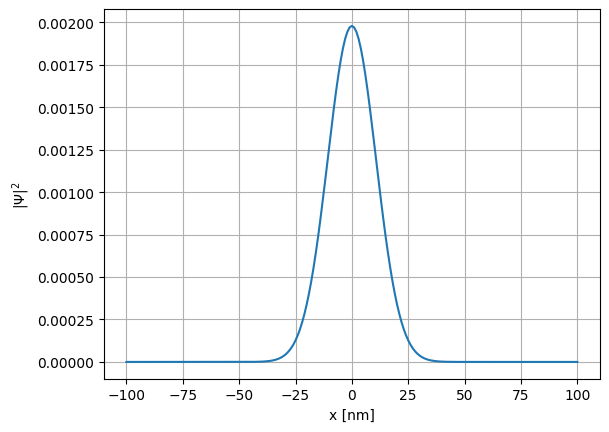

In [ ]:
plt.plot(x_list*0.05292, psi_sq[0])
plt.xlabel('x [nm]')
plt.ylabel(r'$|\Psi|^2$')
plt.grid()
plt.show()

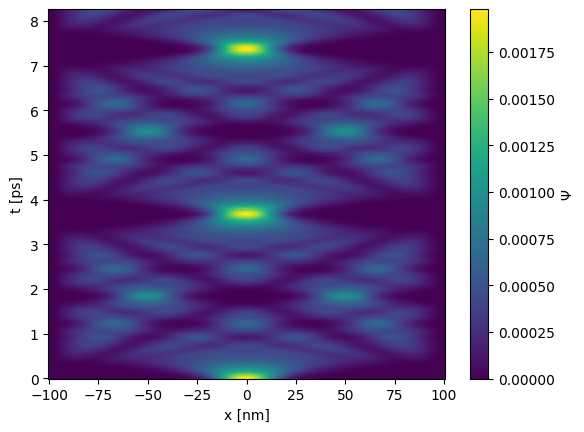

In [ ]:
plt.pcolor(x_list*0.05292, t[0:-1:1000]*2.42E-05, psi_sq[:-1:1000])
plt.xlabel('x [nm]')
plt.ylabel('t [ps]')
cbar = plt.colorbar()
cbar.set_label(r'$\Psi$')
plt.show()


zad 2

In [ ]:
psi_conj = np.conj(psi)

In [ ]:
exp_val = np.zeros(len(t))

In [ ]:
for i in range(0, len(t)):
   exp_val[i] = np.sum(psi_conj[i]*psi[i]*x_list*dx)

/tmp/ipykernel_18658/2519311558.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  exp_val[i] = np.sum(psi_conj[i]*psi[i]*x_list*dx)


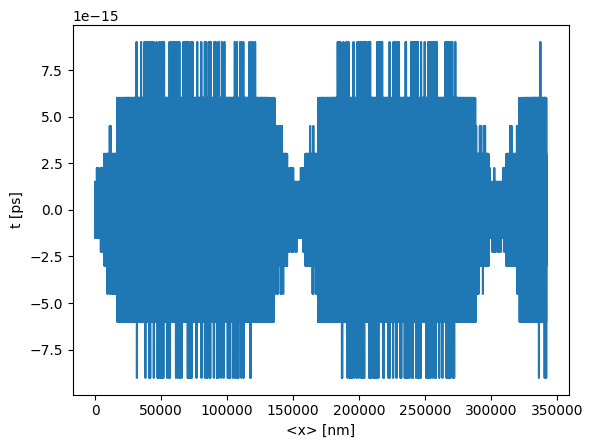

In [ ]:
plt.plot(exp_val*0.0529177)
plt.xlabel('<x> [nm]')
plt.ylabel('t [ps]')
cbar.set_label(r'$\Psi$')
plt.show()

In [ ]:
exp_val_teo = [x0*np.cos(w*i) for i in t]
exp_val_teo = np.array(exp_val_teo)

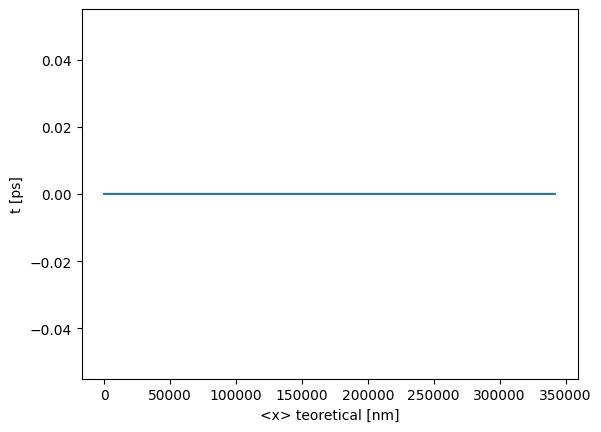

In [ ]:
plt.plot(exp_val_teo*0.0529177)
plt.xlabel('<x> teoretical [nm]')
plt.ylabel('t [ps]')
cbar.set_label(r'$\Psi$')
plt.show()